In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from scipy.signal import welch
import mne
from mne.preprocessing import find_bad_channels_maxwell
from mne.preprocessing import Xdawn
from meegkit.dss import dss_line
from autoreject import AutoReject
from scipy.stats import zscore

In [42]:
raw_dir='/home/bonaiuto/laminar_baby/data/raw/P001_T1/'
deriv_dir='/home/bonaiuto/laminar_baby/data/derivatives/P001_T1/'

In [43]:
raw_path = os.path.join(raw_dir, 'p001_t1_run01-raw.fif')
raw = mne.io.read_raw_fif(raw_path, verbose=False, allow_maxshield=True)

raw_events = mne.find_events(
                raw,
                stim_channel="STI101",
                min_duration=0.002,
                verbose="DEBUG",
                consecutive=True
            )
mne.write_events(os.path.join(deriv_dir, 'p001_t1_run01_raw-eve.fif'), raw_events, overwrite=True)


Using normal I/O
Using normal I/O


/home/bonaiuto/tmp/ipykernel_47262/2779562819.py:2: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne.io.read_raw_fif(raw_path, verbose=False, allow_maxshield=True)


260 events found
Event IDs: [ 34  35  44  55 134 135 144 155 254 255]
Overwriting existing file.


Effective window size : 0.256 (s)


/home/bonaiuto/tmp/ipykernel_47262/2898271089.py:2: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  show=True, picks="meg"
/home/bonaiuto/miniconda3/envs/laminar_baby/lib/python3.7/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


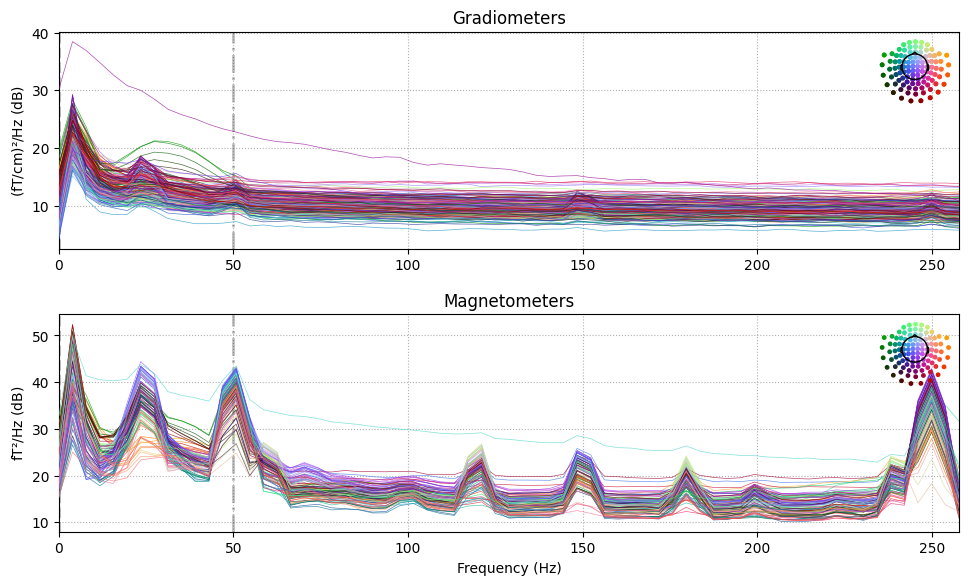

In [45]:
_ = raw.compute_psd(tmax=np.inf, fmax=260).plot(
    show=True, picks="meg"
)

In [46]:
# load and process head position from cHPI
chpi_freqs, ch_idx, chpi_codes = mne.chpi.get_chpi_info(info=raw.info)
print(f"cHPI coil frequencies extracted from raw: {chpi_freqs} Hz")

Using 4 HPI coils: 293 307 314 321 Hz
cHPI coil frequencies extracted from raw: [293. 307. 314. 321.] Hz


In [47]:
chpi_amplitudes = mne.chpi.compute_chpi_amplitudes(raw, verbose=True)
chpi_locs       = mne.chpi.compute_chpi_locs(raw.info, chpi_amplitudes, verbose=True)
head_pos        = mne.chpi.compute_head_pos(raw.info, chpi_locs, verbose=True)

Using 4 HPI coils: 293 307 314 321 Hz
Line interference frequencies: 50 100 150 200 250 300 Hz
Using time window: 142.9 ms
Fitting 4 HPI coil locations at up to 37293 time points (373.0 sec duration)


  0%|          | cHPI amplitudes : 0/37293 [00:00<?,       ?it/s]

Computing 4385 HPI location guesses (1 cm grid in a 10.7 cm sphere)
HPIFIT: 4 coils digitized in order 4 1 3 2
HPI consistency of isotrak and hpifit is OK.


  0%|          | cHPI locations  : 0/37293 [00:00<?,       ?it/s]

[ True  True False  True]
    t=29.000:    3/4 good HPI fits, movements [mm/s] =      0.2 /      0.2 /      0.2 /      0.2
[ True  True False  True]
    t=29.050:    3/4 good HPI fits, movements [mm/s] =     63.7 /     19.2 /    172.3 /     29.2
[ True False  True  True]
    t=29.930:    3/4 good HPI fits, movements [mm/s] =      6.1 /      2.2 /      3.0 /      2.8
[ True False  True  True]
    t=30.230:    3/4 good HPI fits, movements [mm/s] =     20.3 /     11.8 /     13.6 /     11.7
[ True False  True  True]
    t=30.680:    3/4 good HPI fits, movements [mm/s] =      8.9 /      8.5 /      6.0 /      9.0
[ True False  True  True]
    t=31.270:    3/4 good HPI fits, movements [mm/s] =      4.2 /      3.6 /      8.1 /      4.8
[ True  True False  True]
    t=31.320:    3/4 good HPI fits, movements [mm/s] =     65.4 /     32.0 /     84.4 /     46.6
[ True  True False  True]
    t=31.340:    3/4 good HPI fits, movements [mm/s] =    122.2 /     52.4 /    149.0 /     67.9
[ True False  Tr

[ True False  True  True]
    t=79.150:    3/4 good HPI fits, movements [mm/s] =      1.3 /      0.8 /      1.2 /      0.4
[ True False  True  True]
    t=80.150:    3/4 good HPI fits, movements [mm/s] =      0.6 /      0.6 /      1.4 /      0.5
[ True False  True  True]
    t=81.150:    3/4 good HPI fits, movements [mm/s] =      0.3 /      0.1 /      1.7 /      0.0
[ True False  True  True]
    t=82.150:    3/4 good HPI fits, movements [mm/s] =      1.4 /      0.9 /      1.5 /      0.2
[ True False  True  True]
    t=83.150:    3/4 good HPI fits, movements [mm/s] =      2.1 /      0.8 /      0.8 /      0.2
[ True False  True  True]
    t=84.150:    3/4 good HPI fits, movements [mm/s] =      0.9 /      0.3 /      0.6 /      0.3
[ True False  True  True]
    t=85.150:    3/4 good HPI fits, movements [mm/s] =      1.1 /      0.2 /      1.0 /      0.3
[ True False  True  True]
    t=86.150:    3/4 good HPI fits, movements [mm/s] =      0.8 /      0.6 /      0.3 /      0.4
[ True False  Tr

[ True  True False  True]
    t=137.490:   3/4 good HPI fits, movements [mm/s] =     71.5 /     53.6 /     70.1 /     57.4
[ True  True False  True]
    t=137.540:   3/4 good HPI fits, movements [mm/s] =     52.7 /     43.4 /    127.5 /     48.1
[ True  True False  True]
    t=137.570:   3/4 good HPI fits, movements [mm/s] =    161.2 /     29.5 /    128.6 /     32.1
[False  True  True  True]
    t=137.860:   3/4 good HPI fits, movements [mm/s] =     12.0 /      4.8 /      8.2 /      4.0
[ True False  True  True]
    t=138.160:   3/4 good HPI fits, movements [mm/s] =      2.7 /     14.3 /     13.0 /     13.3
[ True False  True  True]
    t=139.160:   3/4 good HPI fits, movements [mm/s] =      1.2 /      4.1 /      1.2 /      4.1
[ True False  True  True]
    t=140.160:   3/4 good HPI fits, movements [mm/s] =      1.0 /      0.8 /      0.6 /      0.6
[ True False  True  True]
    t=141.160:   3/4 good HPI fits, movements [mm/s] =      0.8 /      1.0 /      1.2 /      1.0
[ True False  Tr

/home/bonaiuto/tmp/ipykernel_47262/2833959458.py:3: RuntimeWarning:     t=137.430:   2/4 good HPI fits, cannot determine the transformation (0.97, 1.00, 0.93, 1.00 GOF)!
  head_pos        = mne.chpi.compute_head_pos(raw.info, chpi_locs, verbose=True)
/home/bonaiuto/tmp/ipykernel_47262/2833959458.py:3: RuntimeWarning:     t=137.470:   2/4 good HPI fits, cannot determine the transformation (0.97, 1.00, 0.90, 1.00 GOF)!
  head_pos        = mne.chpi.compute_head_pos(raw.info, chpi_locs, verbose=True)


[ True False  True  True]
    t=167.860:   3/4 good HPI fits, movements [mm/s] =      0.9 /      0.5 /      0.8 /      0.5
[ True False  True  True]
    t=168.860:   3/4 good HPI fits, movements [mm/s] =      0.9 /      1.6 /      0.4 /      0.5
[ True False  True  True]
    t=169.860:   3/4 good HPI fits, movements [mm/s] =      0.7 /      0.8 /      1.1 /      0.6
[ True False  True  True]
    t=170.860:   3/4 good HPI fits, movements [mm/s] =      0.5 /      0.4 /      1.2 /      0.3
[ True  True False  True]
    t=171.860:   3/4 good HPI fits, movements [mm/s] =      1.4 /      1.2 /      1.4 /      0.6
[ True False  True  True]
    t=172.860:   3/4 good HPI fits, movements [mm/s] =      1.1 /      1.2 /      0.6 /      0.9
[ True False  True  True]
    t=173.860:   3/4 good HPI fits, movements [mm/s] =      0.2 /      0.6 /      0.3 /      0.5
[ True  True False  True]
    t=174.860:   3/4 good HPI fits, movements [mm/s] =      1.3 /      1.1 /      3.0 /      1.1
[ True False  Tr

[ True False  True  True]
    t=225.770:   3/4 good HPI fits, movements [mm/s] =      0.9 /      1.0 /      1.8 /      0.1
[ True  True False  True]
    t=226.130:   3/4 good HPI fits, movements [mm/s] =      3.8 /      9.4 /      6.4 /      3.1
[ True  True  True False]
    t=226.500:   3/4 good HPI fits, movements [mm/s] =      7.0 /      0.3 /     13.0 /      7.5
[ True  True False  True]
    t=227.500:   3/4 good HPI fits, movements [mm/s] =      1.9 /      2.4 /      5.2 /      1.1
[ True False  True  True]
    t=228.500:   3/4 good HPI fits, movements [mm/s] =      1.5 /      1.7 /      3.0 /      2.1
[ True  True False  True]
    t=229.500:   3/4 good HPI fits, movements [mm/s] =      1.4 /      2.0 /      3.6 /      3.0
[ True False  True  True]
    t=230.500:   3/4 good HPI fits, movements [mm/s] =      0.9 /      1.9 /      4.9 /      1.9
[ True False  True  True]
    t=231.500:   3/4 good HPI fits, movements [mm/s] =      1.6 /      3.3 /      1.1 /      4.1
[ True False  Tr

[ True False  True  True]
    t=287.200:   3/4 good HPI fits, movements [mm/s] =      1.3 /      0.2 /      1.2 /      0.1
[ True False  True  True]
    t=288.200:   3/4 good HPI fits, movements [mm/s] =      0.6 /      0.4 /      0.6 /      0.2
[ True False  True  True]
    t=289.200:   3/4 good HPI fits, movements [mm/s] =      0.6 /      0.5 /      1.3 /      0.3
[ True False  True  True]
    t=290.200:   3/4 good HPI fits, movements [mm/s] =      0.9 /      0.1 /      0.4 /      0.3
[ True  True  True False]
    t=291.200:   3/4 good HPI fits, movements [mm/s] =      2.5 /      1.8 /      5.6 /      2.7
[ True  True False  True]
    t=292.200:   3/4 good HPI fits, movements [mm/s] =      2.1 /      1.8 /      6.9 /      0.9
[ True  True False  True]
    t=293.200:   3/4 good HPI fits, movements [mm/s] =      1.2 /      2.6 /      4.3 /      3.2
[ True  True  True False]
    t=294.200:   3/4 good HPI fits, movements [mm/s] =      1.4 /      0.7 /      3.2 /      1.6
[ True False  Tr

[ True  True  True False]
    t=340.120:   3/4 good HPI fits, movements [mm/s] =      0.7 /      1.4 /      0.7 /      1.4
[ True False  True  True]
    t=341.120:   3/4 good HPI fits, movements [mm/s] =      0.2 /      0.5 /      0.7 /      0.4
[ True False  True  True]
    t=342.120:   3/4 good HPI fits, movements [mm/s] =      1.0 /      2.5 /      1.2 /      1.1
[ True False  True  True]
    t=342.490:   3/4 good HPI fits, movements [mm/s] =      3.5 /      8.2 /      8.0 /      8.3
[ True False  True  True]
    t=343.490:   3/4 good HPI fits, movements [mm/s] =      1.5 /      2.0 /      2.3 /      2.2
[ True  True  True False]
    t=344.490:   3/4 good HPI fits, movements [mm/s] =      1.4 /      1.3 /      0.8 /      1.3
[ True False  True  True]
    t=345.490:   3/4 good HPI fits, movements [mm/s] =      0.7 /      0.7 /      1.5 /      1.6
[ True False  True  True]
    t=346.490:   3/4 good HPI fits, movements [mm/s] =      0.7 /      2.2 /      1.9 /      2.3
[ True False  Tr

[ True  True False  True]
    t=399.500:   3/4 good HPI fits, movements [mm/s] =      2.8 /      3.1 /      6.7 /      4.9
[ True  True False  True]
    t=399.660:   3/4 good HPI fits, movements [mm/s] =      7.0 /     20.5 /     21.4 /     21.9
[ True  True False  True]
    t=399.700:   3/4 good HPI fits, movements [mm/s] =    101.6 /     33.1 /    120.2 /     30.6
[ True  True False  True]
    t=399.740:   3/4 good HPI fits, movements [mm/s] =     72.3 /     30.2 /     75.7 /     32.4
[ True  True False  True]
    t=400.260:   3/4 good HPI fits, movements [mm/s] =      3.8 /      3.7 /      9.1 /      6.6
[ True  True False  True]
    t=401.260:   3/4 good HPI fits, movements [mm/s] =      1.7 /      2.6 /      2.8 /      5.2
[ True  True False  True]
    t=401.910:   3/4 good HPI fits, movements [mm/s] =      2.3 /      2.7 /      4.4 /      1.7


In [57]:
used_coils=np.array([0, 2, 3])
coil_labels=['lpa','rpa','nas']

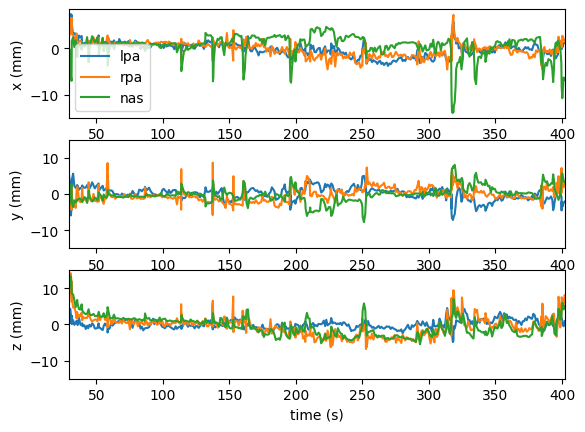

In [97]:
plt.figure()

plt.subplot(3,1,1)
for idx,i in enumerate(used_coils):
    c=chpi_locs['rrs'][:,i,0]-np.mean(chpi_locs['rrs'][:,i,0])
    plt.plot(chpi_locs['times'], c*1000, label=labels[idx])
plt.legend()
#plt.ylim([-10,10])
plt.xlim(chpi_locs['times'][[0,-1]])
plt.ylabel('x (mm)')

plt.subplot(3,1,2)
for idx,i in enumerate(used_coils):
    c=chpi_locs['rrs'][:,i,1]-np.mean(chpi_locs['rrs'][:,i,1])
    plt.plot(chpi_locs['times'], c*1000)
plt.ylim([-15,15])
plt.xlim(chpi_locs['times'][[0,-1]])
plt.ylabel('y (mm)')

plt.subplot(3,1,3)
for idx,i in enumerate(used_coils):
    c=chpi_locs['rrs'][:,i,2]-np.mean(chpi_locs['rrs'][:,i,2])
    plt.plot(chpi_locs['times'], c*1000)
plt.ylim([-15,15])
plt.xlim(chpi_locs['times'][[0,-1]])
plt.ylabel('z (mm)')
plt.xlabel('time (s)')

plt.savefig('../figures/chpi_coil_movement.png')
plt.savefig('../figures/chpi_coil_movement.pdf')
plt.show()

In [73]:
for idx,i in enumerate(used_coils):
    sd=np.std(chpi_locs['rrs'][:,i,0])*1000
    print(f'{labels[idx]}, x SD={sd:.2f} mm')
for idx,i in enumerate(used_coils):
    sd=np.std(chpi_locs['rrs'][:,i,1])*1000
    print(f'{labels[idx]}, y SD={sd:.2f} mm')
for idx,i in enumerate(used_coils):
    sd=np.std(chpi_locs['rrs'][:,i,2])*1000
    print(f'{labels[idx]}, z SD={sd:.2f} mm')
    

lpa, x SD=1.81 mm
rpa, x SD=1.78 mm
nas, x SD=3.03 mm
lpa, y SD=1.98 mm
rpa, y SD=2.14 mm
nas, y SD=2.31 mm
lpa, z SD=1.25 mm
rpa, z SD=3.24 mm
nas, z SD=3.06 mm


In [74]:
lpa_pos=chpi_locs['rrs'][:,used_coils[0],:]
rpa_pos=chpi_locs['rrs'][:,used_coils[1],:]
nas_pos=chpi_locs['rrs'][:,used_coils[2],:]

In [75]:
lpa_rpa_dist=np.sqrt(np.sum((lpa_pos-rpa_pos)**2,axis=-1))
lpa_nas_dist=np.sqrt(np.sum((lpa_pos-nas_pos)**2,axis=-1))
rpa_nas_dist=np.sqrt(np.sum((rpa_pos-nas_pos)**2,axis=-1))

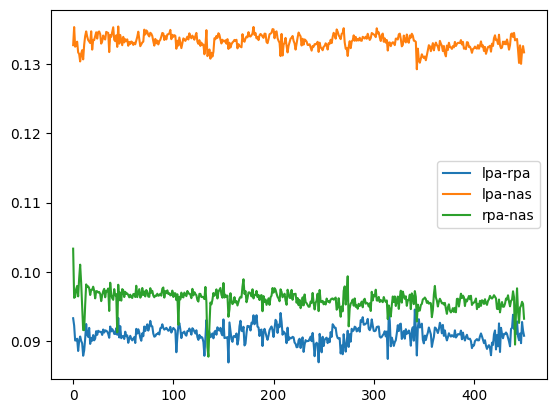

In [76]:
plt.figure()
plt.plot(lpa_rpa_dist,label='lpa-rpa')
plt.plot(lpa_nas_dist,label='lpa-nas')
plt.plot(rpa_nas_dist,label='rpa-nas')
plt.legend()
plt.show()

In [77]:
print(f'LPA-RPA = {np.mean(lpa_rpa_dist)*1000} mm')
print(f'LPA-NAS = {np.mean(lpa_nas_dist)*1000} mm')
print(f'RPA-NAS = {np.mean(rpa_nas_dist)*1000} mm')

LPA-RPA = 90.95155329317679 mm
LPA-NAS = 133.24149494160756 mm
RPA-NAS = 96.0420901442626 mm


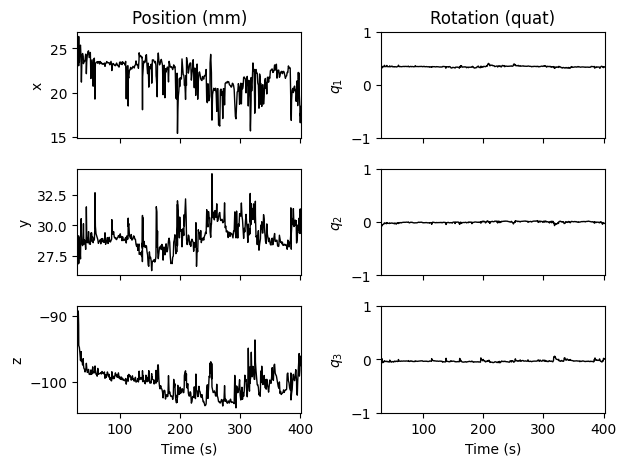

In [99]:
fig=mne.viz.plot_head_positions(head_pos, mode="traces")
fig.savefig('../figures/head_pos.png')
fig.savefig('../figures/head_pos.pdf')

Getting helmet for system 306m


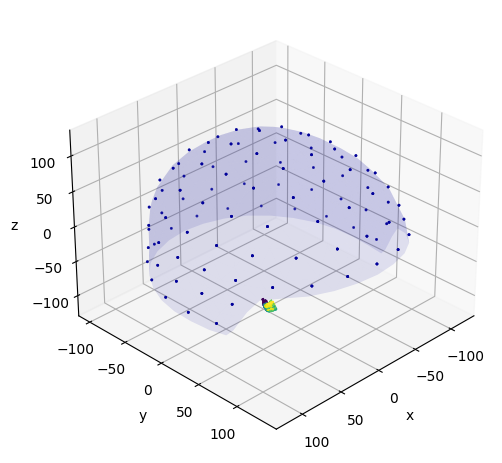

In [100]:
fig=mne.viz.plot_head_positions(
    head_pos, mode="field", destination=raw.info["dev_head_t"], info=raw.info
) #visualization 3D
fig.savefig('../figures/head_movement.png')
fig.savefig('../figures/head_movement.pdf')

In [82]:
fine_cal_file = os.path.join(raw_dir, 'sss_config/sss_cal_3101_160108.dat')
crosstalk_file = os.path.join(raw_dir, 'sss_config/ct_sparse.fif')

In [83]:
raw.info["bads"] = []
raw_check = raw.copy()
auto_noisy_chs, auto_flat_chs, auto_scores = find_bad_channels_maxwell(
    raw_check,
    cross_talk=crosstalk_file,
    calibration=fine_cal_file,
    return_scores=True,
    verbose=True,
)
print(auto_noisy_chs)
print(auto_flat_chs)

Applying low-pass filter with 40.0 Hz cutoff frequency ...
Reading 0 ... 372999  =      0.000 ...   372.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Scanning for bad channels in 74 intervals (5.0 sec) ...
102 of 102 magnetometer types replaced with T3.
    No bad MEG channels
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sss_cal_3101_160108.dat


[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.8s finished


        Adjusting non-orthogonal EX and EY
        Adjusted coil positions by (μ ± σ): 0.5° ± 0.4° (max: 1.7°)
    Automatic origin fit: head of radius 64.4 mm
    Using origin -24.9, 6.4, 44.4 mm in the head frame
        Interval   1:    0.000 -    4.999


/home/bonaiuto/tmp/ipykernel_47262/1644290320.py:8: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  verbose=True,


        Interval   2:    5.000 -    9.999
        Interval   3:   10.000 -   14.999
        Interval   4:   15.000 -   19.999
        Interval   5:   20.000 -   24.999
        Interval   6:   25.000 -   29.999
        Interval   7:   30.000 -   34.999
        Interval   8:   35.000 -   39.999
        Interval   9:   40.000 -   44.999
        Interval  10:   45.000 -   49.999
        Interval  11:   50.000 -   54.999
        Interval  12:   55.000 -   59.999
        Interval  13:   60.000 -   64.999
        Interval  14:   65.000 -   69.999
        Interval  15:   70.000 -   74.999
        Interval  16:   75.000 -   79.999
        Interval  17:   80.000 -   84.999
        Interval  18:   85.000 -   89.999
        Interval  19:   90.000 -   94.999
        Interval  20:   95.000 -   99.999
        Interval  21:  100.000 -  104.999
        Interval  22:  105.000 -  109.999
        Interval  23:  110.000 -  114.999
        Interval  24:  115.000 -  119.999
        Interval  25:  120.000 -  

In [84]:
bads = raw.info["bads"] + auto_noisy_chs + auto_flat_chs
raw.info["bads"] = bads

In [85]:
raw_sss = mne.preprocessing.maxwell_filter(
    raw, cross_talk=crosstalk_file, calibration=fine_cal_file, 
    head_pos=head_pos,
    st_duration = 10,
    verbose=True
)

Maxwell filtering raw data
102 of 102 magnetometer types replaced with T3.
    Bad MEG channels being reconstructed: ['MEG0611', 'MEG2032', 'MEG2333']
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sss_cal_3101_160108.dat
        Adjusting non-orthogonal EX and EY
        Adjusted coil positions by (μ ± σ): 0.5° ± 0.4° (max: 1.7°)
    Automatic origin fit: head of radius 64.4 mm
    Using origin -24.9, 6.4, 44.4 mm in the head frame
    Processing data using tSSS with st_duration=10.0


/home/bonaiuto/tmp/ipykernel_47262/2775870061.py:5: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  verbose=True


        Using 74/95 harmonic components for    0.000  (59/80 in, 15/15 out)
    Appending head position result channels and loading raw data from disk
    Spatiotemporal window did not fit evenly intocontiguous data segment. 3.00 seconds were lumped into the previous window.
    Processing 37 data chunks
        Using 74/95 harmonic components for    0.000  (59/80 in, 15/15 out)
        Projecting  6 intersecting tSSS components for    0.000 -    9.999 sec  (#1/37) (across 22 positions)
        Using 73/95 harmonic components for    0.000  (58/80 in, 15/15 out)
        Using 69/95 harmonic components for    0.050  (54/80 in, 15/15 out)
        Using 73/95 harmonic components for    0.930  (58/80 in, 15/15 out)
        Using 75/95 harmonic components for    1.230  (60/80 in, 15/15 out)
        Using 75/95 harmonic components for    1.680  (60/80 in, 15/15 out)
        Using 72/95 harmonic components for    2.270  (57/80 in, 15/15 out)
        Using 74/95 harmonic components for    2.320

        Using 73/95 harmonic components for   69.520  (58/80 in, 15/15 out)
        Using 73/95 harmonic components for   70.000  (58/80 in, 15/15 out)
        Projecting  4 intersecting tSSS components for   70.000 -   79.999 sec  (#8/37) (across 11 positions)
        Using 73/95 harmonic components for   70.520  (58/80 in, 15/15 out)
        Using 74/95 harmonic components for   71.520  (59/80 in, 15/15 out)
        Using 74/95 harmonic components for   72.520  (59/80 in, 15/15 out)
        Using 73/95 harmonic components for   73.520  (58/80 in, 15/15 out)
        Using 73/95 harmonic components for   74.520  (58/80 in, 15/15 out)
        Using 73/95 harmonic components for   75.520  (58/80 in, 15/15 out)
        Using 74/95 harmonic components for   76.520  (59/80 in, 15/15 out)
        Using 73/95 harmonic components for   77.520  (58/80 in, 15/15 out)
        Using 73/95 harmonic components for   78.520  (58/80 in, 15/15 out)
        Using 73/95 harmonic components for   79.520  

        Using 72/95 harmonic components for  140.860  (57/80 in, 15/15 out)
        Using 72/95 harmonic components for  141.860  (57/80 in, 15/15 out)
        Using 72/95 harmonic components for  142.860  (57/80 in, 15/15 out)
        Using 69/95 harmonic components for  143.860  (54/80 in, 15/15 out)
        Using 71/95 harmonic components for  144.860  (56/80 in, 15/15 out)
        Using 72/95 harmonic components for  145.860  (57/80 in, 15/15 out)
        Using 71/95 harmonic components for  146.860  (56/80 in, 15/15 out)
        Using 70/95 harmonic components for  147.860  (55/80 in, 15/15 out)
        Using 69/95 harmonic components for  148.860  (54/80 in, 15/15 out)
        Using 70/95 harmonic components for  149.860  (55/80 in, 15/15 out)
        Using 69/95 harmonic components for  150.000  (54/80 in, 15/15 out)
        Projecting  4 intersecting tSSS components for  150.000 -  159.999 sec (#16/37) (across 11 positions)
        Using 71/95 harmonic components for  150.860  

        Projecting  5 intersecting tSSS components for  220.000 -  229.999 sec (#23/37) (across 15 positions)
        Using 72/95 harmonic components for  220.500  (57/80 in, 15/15 out)
        Using 75/95 harmonic components for  220.900  (60/80 in, 15/15 out)
        Using 71/95 harmonic components for  221.110  (56/80 in, 15/15 out)
        Using 69/95 harmonic components for  222.110  (54/80 in, 15/15 out)
        Using 74/95 harmonic components for  223.110  (59/80 in, 15/15 out)
        Using 74/95 harmonic components for  223.320  (59/80 in, 15/15 out)
        Using 73/95 harmonic components for  223.630  (58/80 in, 15/15 out)
        Using 75/95 harmonic components for  223.830  (60/80 in, 15/15 out)
        Using 70/95 harmonic components for  224.210  (55/80 in, 15/15 out)
        Using 69/95 harmonic components for  225.200  (54/80 in, 15/15 out)
        Using 69/95 harmonic components for  226.200  (54/80 in, 15/15 out)
        Using 70/95 harmonic components for  227.200  

        Using 70/95 harmonic components for  295.810  (55/80 in, 15/15 out)
        Using 72/95 harmonic components for  296.470  (57/80 in, 15/15 out)
        Using 75/95 harmonic components for  296.590  (60/80 in, 15/15 out)
        Using 73/95 harmonic components for  297.590  (58/80 in, 15/15 out)
        Using 73/95 harmonic components for  298.590  (58/80 in, 15/15 out)
        Using 69/95 harmonic components for  299.590  (54/80 in, 15/15 out)
        Using 72/95 harmonic components for  300.000  (57/80 in, 15/15 out)
        Projecting  5 intersecting tSSS components for  300.000 -  309.999 sec (#31/37) (across 13 positions)
        Using 72/95 harmonic components for  300.480  (57/80 in, 15/15 out)
        Using 72/95 harmonic components for  301.480  (57/80 in, 15/15 out)
        Using 73/95 harmonic components for  302.480  (58/80 in, 15/15 out)
        Using 70/95 harmonic components for  303.480  (55/80 in, 15/15 out)
        Using 72/95 harmonic components for  304.480  

        Using 72/95 harmonic components for  372.260  (57/80 in, 15/15 out)
        Using 72/95 harmonic components for  372.910  (57/80 in, 15/15 out)
[done]


Using matplotlib as 2D backend.


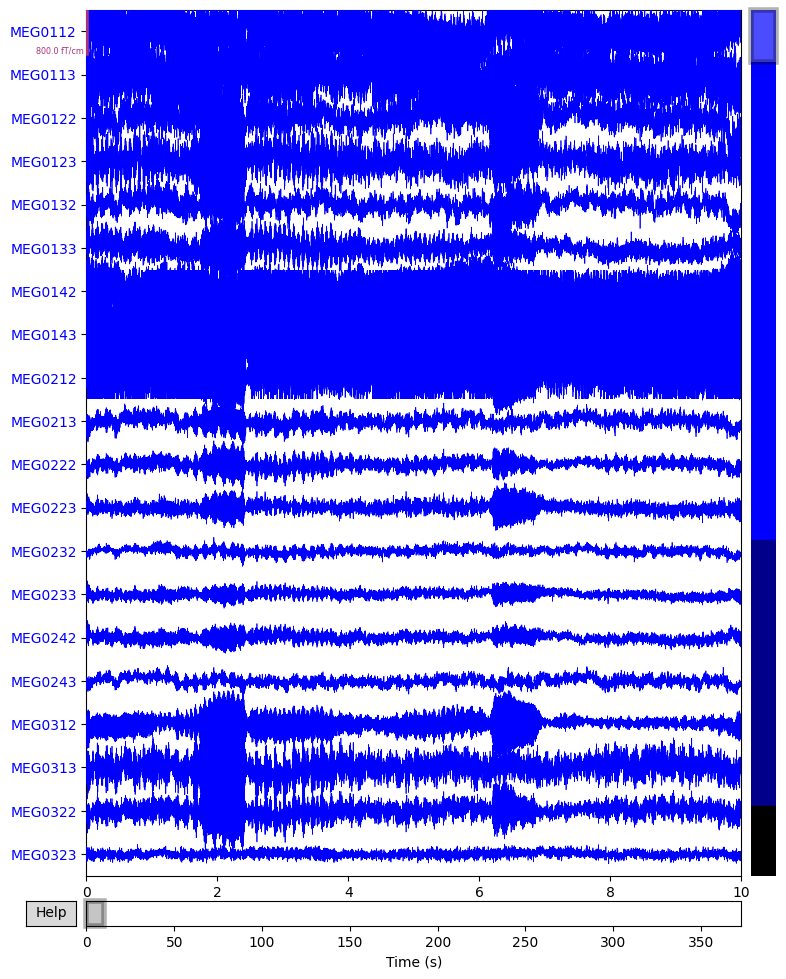

Effective window size : 0.256 (s)


/home/bonaiuto/tmp/ipykernel_47262/3274267170.py:2: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  raw_sss.compute_psd().plot()
/home/bonaiuto/miniconda3/envs/laminar_baby/lib/python3.7/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


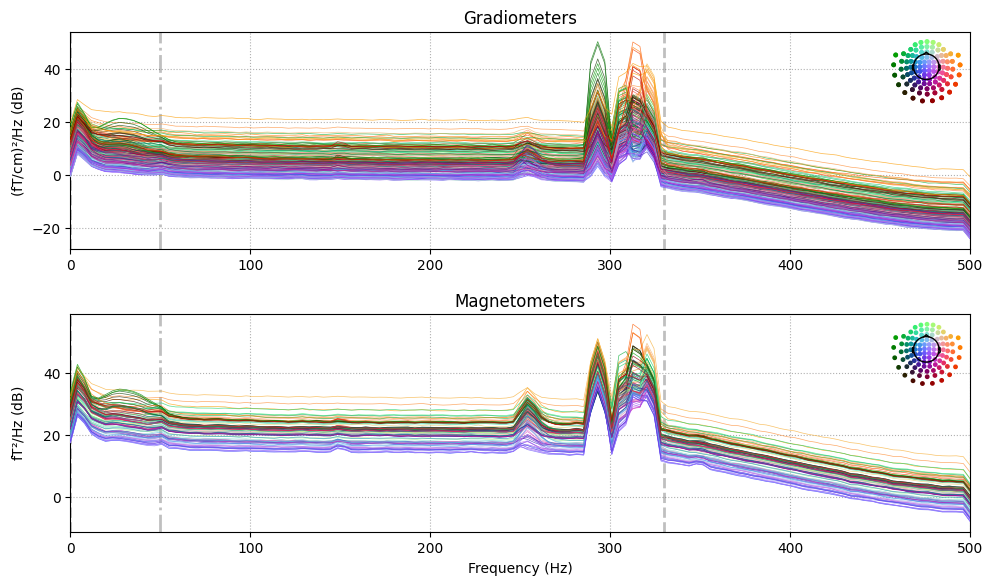

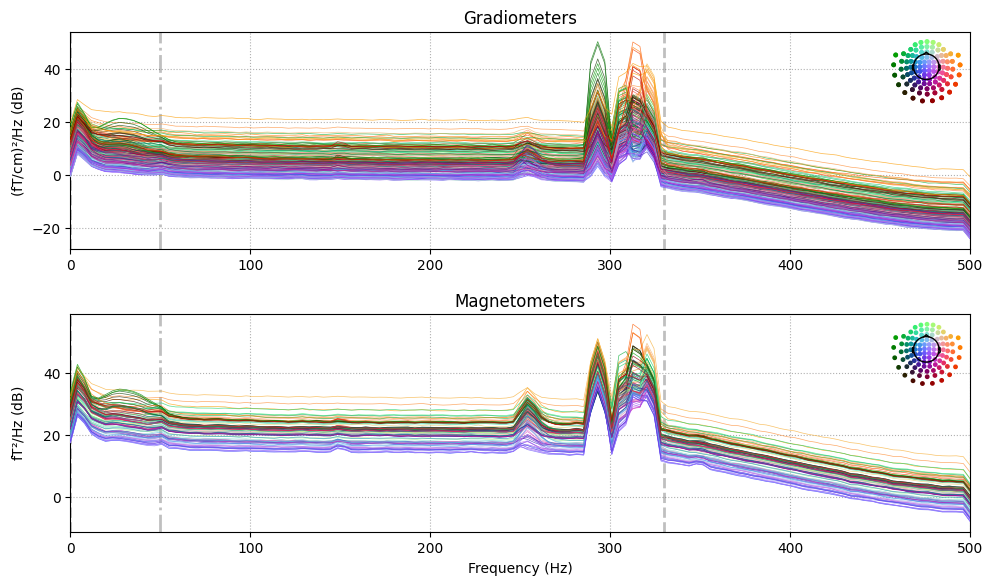

In [86]:
raw_sss.plot()
raw_sss.compute_psd().plot()

In [87]:
raw_sss.save(
    os.path.join(deriv_dir, 'sss_p001_t1_run01_raw.fif'),
    overwrite=True
)

Overwriting existing file.
Writing /home/bonaiuto/laminar_baby/data/derivatives/P001_T1/sss_p001_t1_run01_raw.fif
Closing /home/bonaiuto/laminar_baby/data/derivatives/P001_T1/sss_p001_t1_run01_raw.fif
[done]


In [88]:
raw_filtered = raw_sss.copy()
raw_filtered.load_data().crop(
    tmin=raw_filtered.times[raw_events[0, 0]]
)
raw_filtered.filter(
    l_freq=1.,
    h_freq=30,
    n_jobs=-1
)

ica = mne.preprocessing.ICA(
    method="infomax",
    fit_params=dict(extended=True),
    n_components=25,
    max_iter=5000
)
ica.fit(raw_filtered)

ica.save(
    os.path.join(deriv_dir, 'ica_p001_t1_run01_raw.fif'),
    overwrite=True
)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    5.1s


Fitting ICA to data using 306 channels (please be patient, this may take a while)


[Parallel(n_jobs=-1)]: Done 306 out of 306 | elapsed:    5.4s finished


Selecting by number: 25 components
Computing Extended Infomax ICA
Fitting ICA took 82.1s.
Overwriting existing file.
Writing ICA solution to /home/bonaiuto/laminar_baby/data/derivatives/P001_T1/ica_p001_t1_run01_raw.fif...


/home/bonaiuto/tmp/ipykernel_47262/3154980331.py:21: RuntimeWarning: This filename (/home/bonaiuto/laminar_baby/data/derivatives/P001_T1/ica_p001_t1_run01_raw.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  overwrite=True


<ICA | raw data decomposition, method: infomax (fit in 5000 iterations on 341682 samples), 25 ICA components (306 PCA components available), channel types: mag, grad, no sources marked for exclusion>

In [89]:
ica_exc=[0,1,8,19,20]

In [90]:
raw_sss = ica.apply(
    raw_sss,
    exclude=ica_exc,
    verbose=False
)

raw_sss = raw_sss.filter(
    l_freq=None,
    h_freq=30
)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    2.9s finished


Effective window size : 0.256 (s)


/home/bonaiuto/tmp/ipykernel_47262/954056431.py:2: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  show=True, picks="meg"
/home/bonaiuto/miniconda3/envs/laminar_baby/lib/python3.7/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


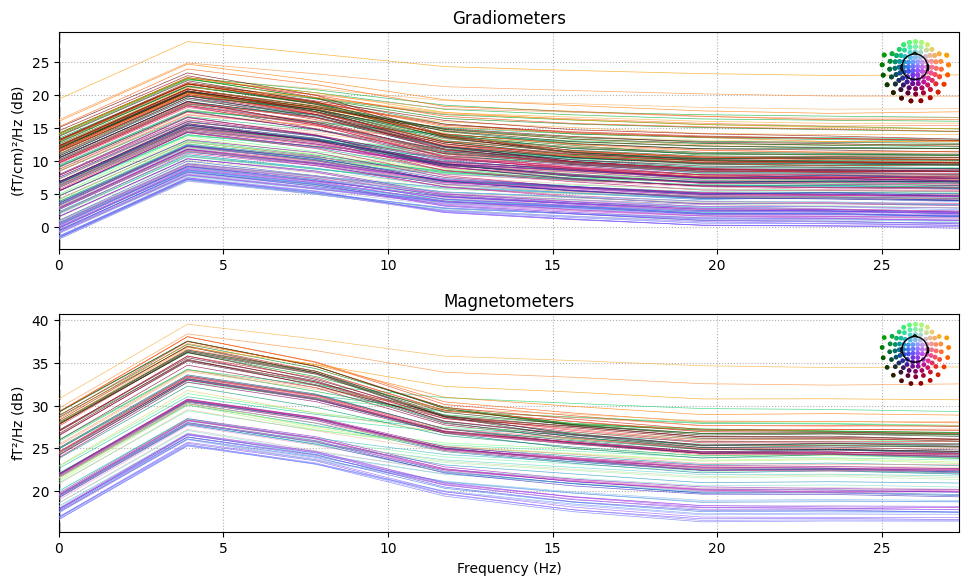

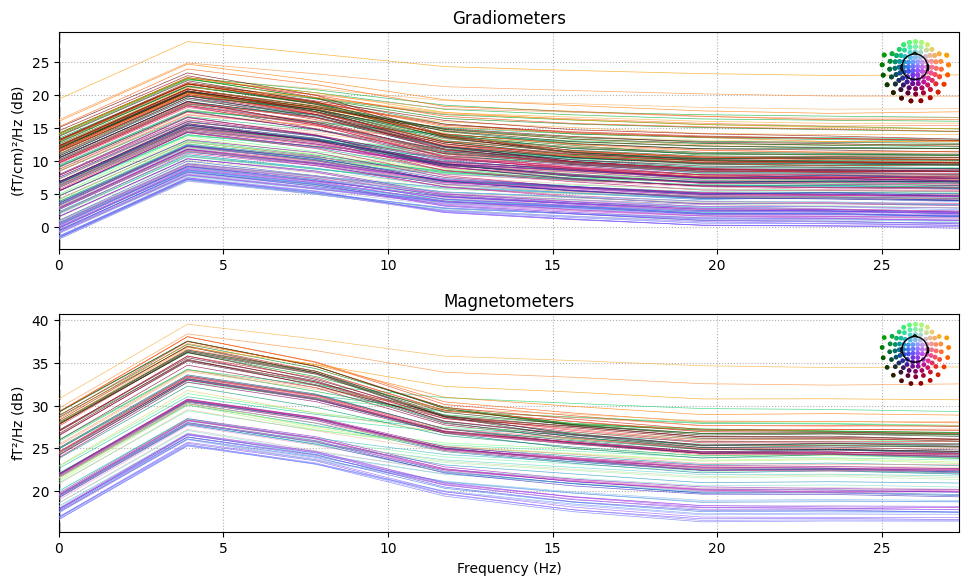

In [91]:
raw_sss.compute_psd(tmax=np.inf, fmax=30).plot(
    show=True, picks="meg"
)

In [92]:
np.unique(raw_events[:,2])

array([ 34,  35,  44,  55, 134, 135, 144, 155, 254, 255])

Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 86 events and 2001 original time points ...
0 bad epochs dropped


/home/bonaiuto/tmp/ipykernel_47262/3166044219.py:12: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  epoch.average().plot(show=False)#_joint()


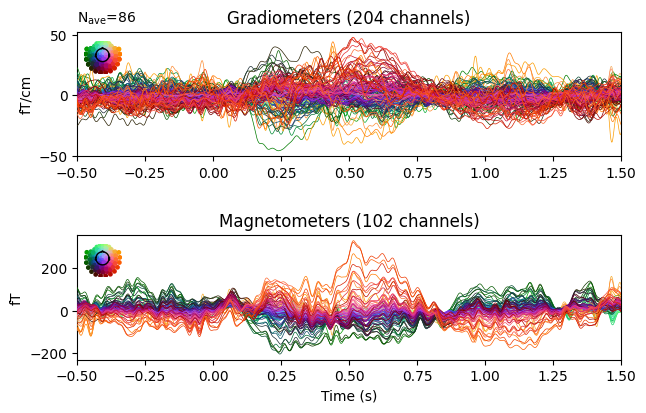

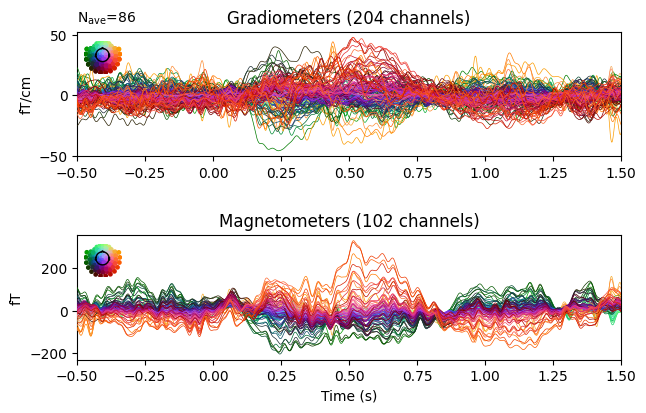

In [93]:
trig=[ 34,  35, 44,  55]
epoch = mne.Epochs(
    raw_sss.pick('meg'),
    mne.pick_events(raw_events, include=trig),
    tmin=-.5,
    tmax=1.5,
    baseline=None,
    verbose=True,
    detrend=1,
    preload=True
)
epoch.average().plot(show=False)#_joint()

In [94]:
ar = AutoReject(
    consensus=np.linspace(0, 1.0, 27),
    n_interpolate=np.array([1, 4, 32]),
    thresh_method="bayesian_optimization",
    cv=10,
    n_jobs=-1,
    random_state=42,
    verbose="progressbar"
)
ar.fit(epoch)
epoch_ar, rej_log = ar.transform(epoch, return_log=True)

Running autoreject on ch_type=mag


  0%|          | Creating augmented epochs : 0/102 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/102 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.19 and n_interpolate=1
Running autoreject on ch_type=grad


  0%|          | Creating augmented epochs : 0/204 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/204 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.31 and n_interpolate=1


  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

Dropped 6 epochs: 21, 22, 28, 50, 66, 73


No projector specified for this dataset. Please consider the method self.add_proj.


/home/bonaiuto/tmp/ipykernel_47262/1218377883.py:1: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  fig=epoch_ar.average().plot_joint(show=True)
/home/bonaiuto/tmp/ipykernel_47262/1218377883.py:1: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  fig=epoch_ar.average().plot_joint(show=True)


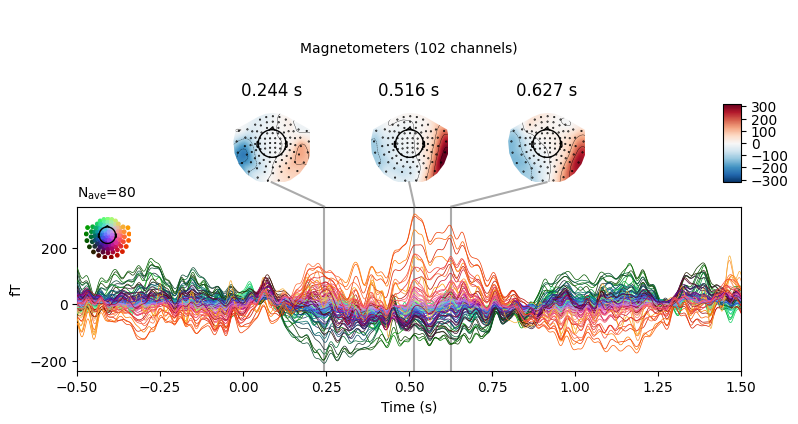

/home/bonaiuto/tmp/ipykernel_47262/1218377883.py:1: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  fig=epoch_ar.average().plot_joint(show=True)
/home/bonaiuto/tmp/ipykernel_47262/1218377883.py:1: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  fig=epoch_ar.average().plot_joint(show=True)


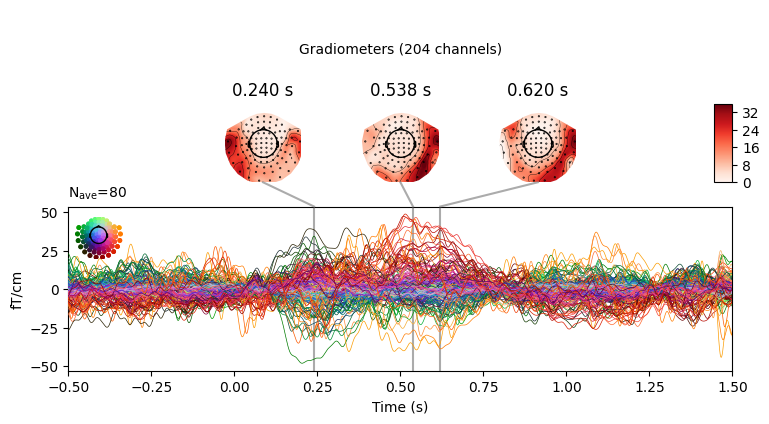

In [101]:
fig=epoch_ar.average().plot_joint(show=True)

In [104]:
fig[0].savefig('../figures/erf_mag.png')
fig[0].savefig('../figures/erf_mag.pdf')

fig[1].savefig('../figures/erf_grad.png')
fig[1].savefig('../figures/erf_grad.pdf')

In [96]:
epoch_ar.save(
    os.path.join(deriv_dir, 'p001_t1_run01_epo.fif'),
    overwrite=True
)

Overwriting existing file.


In [108]:
epo_grad_data = epoch_ar.copy().pick_types(meg='grad').get_data()
epo_mag_data = epoch_ar.copy().pick_types(meg='mag').get_data()

(80, 102, 2001)

In [111]:
# Compute the mean across trials (trials x channels x time -> channels x time)
m_grad_data = np.mean(epo_grad_data, axis=0)
m_mag_data = np.mean(epo_mag_data, axis=0)

# Pre-allocate SNR arrays
grad_snr = np.zeros((epo_grad_data.shape[1], epo_grad_data.shape[2]))
mag_snr = np.zeros((epo_mag_data.shape[1], epo_mag_data.shape[2]))

# Compute variance for each channel and time point
v_grad_data = np.var(epo_grad_data, axis=0, ddof=1)
v_mag_data = np.var(epo_mag_data, axis=0, ddof=1)

# Compute SNR for each channel and time point in dB
for i in range(epo_grad_data.shape[1]):
    for j in range(epo_grad_data.shape[2]):
        if v_grad_data[i, j] != 0:  # Avoid division by zero
            grad_snr[i, j] = 10 * np.log10(m_grad_data[i, j] ** 2 / v_grad_data[i, j])
        else:
            grad_snr[i, j] = np.nan  # Assign NaN where variance is zero

for i in range(epo_mag_data.shape[1]):
    for j in range(epo_mag_data.shape[2]):
        if v_mag_data[i, j] != 0:  # Avoid division by zero
            mag_snr[i, j] = 10 * np.log10(m_mag_data[i, j] ** 2 / v_mag_data[i, j])
        else:
            mag_snr[i, j] = np.nan  # Assign NaN where variance is zero

# Handle NaNs by replacing them with a minimum valid value or zero if none are valid
min_grad_snr = np.nanmin(grad_snr[np.isfinite(grad_snr)]) if np.isfinite(grad_snr).any() else 0
min_mag_snr = np.nanmin(mag_snr[np.isfinite(mag_snr)]) if np.isfinite(mag_snr).any() else 0

grad_snr[np.isnan(grad_snr)] = min_grad_snr
mag_snr[np.isnan(mag_snr)] = min_mag_snr


/home/bonaiuto/tmp/ipykernel_47262/594904003.py:33: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  mne.viz.plot_sensors(inset_mag_info, ch_groups=[[max_mag_idx]], pointsize=20, linewidth=0, axes=ax)


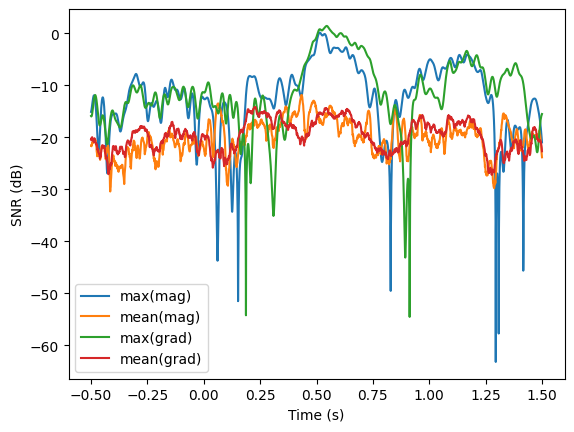

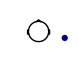

/home/bonaiuto/tmp/ipykernel_47262/594904003.py:39: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  mne.viz.plot_sensors(inset_grad_info, ch_groups=[[max_grad_idx]], pointsize=20, linewidth=0, axes=ax)


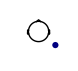

In [236]:
import matplotlib.pyplot as plt
import mne
import numpy as np

# Generate the main figure for SNR plots using GridSpec
fig = plt.figure()

# Create the main plots
max_mag_idx = np.argmax(np.max(mag_snr, axis=-1))
plt.plot(epoch_ar.times, mag_snr[max_mag_idx, :].T, label='max(mag)')
plt.plot(epoch_ar.times, np.mean(mag_snr, axis=0), label='mean(mag)')
max_grad_idx = np.argmax(np.max(grad_snr, axis=-1))
plt.plot(epoch_ar.times, grad_snr[max_grad_idx, :].T, label='max(grad)')
plt.plot(epoch_ar.times, np.mean(grad_snr, axis=0), label='mean(grad)')
plt.legend()
plt.ylabel('SNR (dB)')
plt.xlabel('Time (s)')

# Create insets manually after all main plots
# Define insets
inset_mag_info = epoch_ar.copy().pick_types(meg='mag').info
inset_grad_info = epoch_ar.copy().pick_types(meg='grad').info

# Save figures
plt.savefig('../figures/snr.png')
plt.savefig('../figures/snr.pdf')


# Plot sensors in insets

fig=plt.figure(figsize=(.75,.75))
ax=plt.subplot(1,1,1)
mne.viz.plot_sensors(inset_mag_info, ch_groups=[[max_mag_idx]], pointsize=20, linewidth=0, axes=ax)
fig.savefig('../figures/snr_mag.png')
fig.savefig('../figures/snr_mag.pdf')

fig=plt.figure(figsize=(.75,.75))
ax=plt.subplot(1,1,1)
mne.viz.plot_sensors(inset_grad_info, ch_groups=[[max_grad_idx]], pointsize=20, linewidth=0, axes=ax)
fig.savefig('../figures/snr_grad.png')
fig.savefig('../figures/snr_grad.pdf')

/home/bonaiuto/tmp/ipykernel_47262/28095914.py:20: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  im, _ = mne.viz.plot_topomap(normalized_peak_mag_snr, info_mag, axes=ax1, vlim=(0, 1), cmap='Reds', show=False)
/home/bonaiuto/tmp/ipykernel_47262/28095914.py:21: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  mne.viz.plot_topomap(normalized_peak_grad_snr, info_grad, axes=ax2, vlim=(0, 1), cmap='Reds', show=False)
/home/bonaiuto/tmp/ipykernel_47262/28095914.py:22: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  im, _ = mne.viz.plot_topomap(normalized_mean_mag_snr, info_mag, axes=ax3, vlim=(0, 1), cmap='Reds', show=False)
/home/bonaiuto/tmp/ipykernel_47262/28095914.py:23: RuntimeWarning: (X, Y) fit (-24.9, 6.4) more than 20 mm from head frame origin
  mne.viz.plot_topomap(normalized_mean_grad_snr, info_grad, axes=ax4, vlim=(0, 1), cmap='Reds', show=False)


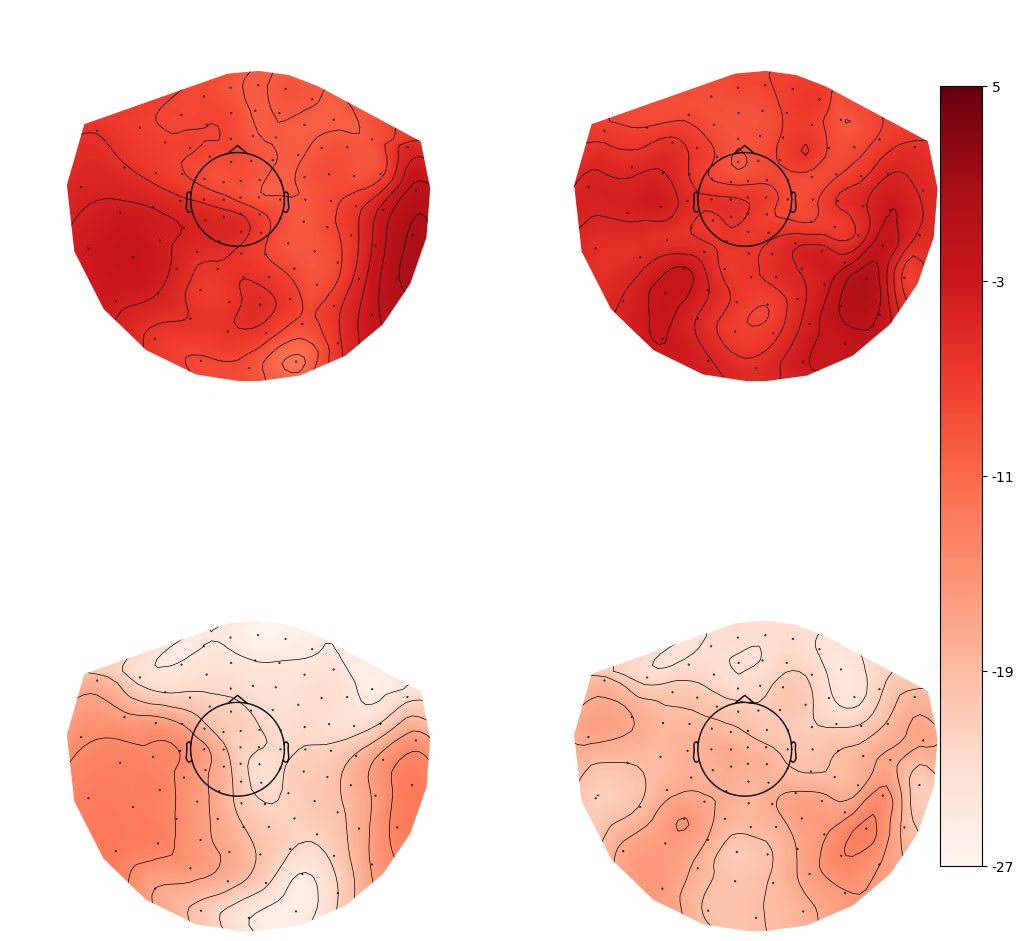

<Figure size 640x480 with 0 Axes>

In [259]:
peak_mag_snr=np.max(mag_snr,axis=-1)
peak_grad_snr=np.max(grad_snr,axis=-1)

mean_mag_snr=np.mean(mag_snr,axis=-1)
mean_grad_snr=np.mean(grad_snr,axis=-1)
vmin=-27
vmax=5


# Normalize the SNR data to [0, 1] for consistent handling in plot_topomap
normalized_peak_mag_snr = (peak_mag_snr - vmin) / (vmax - vmin)
normalized_peak_grad_snr = (peak_grad_snr - vmin) / (vmax - vmin)
normalized_mean_mag_snr = (mean_mag_snr - vmin) / (vmax - vmin)
normalized_mean_grad_snr = (mean_grad_snr - vmin) / (vmax - vmin)

# Set the figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Plotting the topomaps with normalized data
im, _ = mne.viz.plot_topomap(normalized_peak_mag_snr, info_mag, axes=ax1, vlim=(0, 1), cmap='Reds', show=False)
mne.viz.plot_topomap(normalized_peak_grad_snr, info_grad, axes=ax2, vlim=(0, 1), cmap='Reds', show=False)
im, _ = mne.viz.plot_topomap(normalized_mean_mag_snr, info_mag, axes=ax3, vlim=(0, 1), cmap='Reds', show=False)
mne.viz.plot_topomap(normalized_mean_grad_snr, info_grad, axes=ax4, vlim=(0, 1), cmap='Reds', show=False)


# Adjusting colorbar
ax_x_start = 0.90
ax_x_width = 0.035
ax_y_start = 0.2
ax_y_height = 0.65
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
colorbar=fig.colorbar(im, cax=cbar_ax)
# Adjust colorbar to reflect actual SNR values
colorbar_ticks = np.linspace(0, 1, num=5)  # Create 5 ticks from 0 to 1
colorbar_ticklabels = np.linspace(vmin, vmax, num=5)  # Map those ticks to the original SNR range
colorbar.set_ticks(colorbar_ticks)
colorbar.set_ticklabels(['{:.0f}'.format(tick) for tick in colorbar_ticklabels])

plt.show()
plt.tight_layout()

fig.savefig('../figures/snr_topo.png')
fig.savefig('../figures/snr_topo.pdf')